In [1]:
import torch
import pandas as pd
from efficientnet_pytorch import EfficientNet
from torch import nn
import myconfig
import math
from mydatasetclass import FacialKeypointDataset
from torch.utils.data import DataLoader,Dataset
from tqdm import tqdm
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
images = pd.read_csv("../data/training_new.csv")
image = [int(i) for i in images['Image'][100].split()]

In [3]:
len(image),math.sqrt(len(image))

(9216, 96.0)

In [5]:
checkpoint = torch.load("b1.pth.tar",map_location=torch.device('cpu'))
state_dict = checkpoint["state_dict"]
model = EfficientNet.from_pretrained("efficientnet-b0")
model._fc = nn.Linear(1280, 30)
model = model.to("cpu")
model.load_state_dict(state_dict)

Loaded pretrained weights for efficientnet-b0


<All keys matched successfully>

In [6]:
req_shape = [1,3,96,96]

In [7]:
mean = [0.4897, 0.4897, 0.4897]
std = [0.2330, 0.2330, 0.2330]

image_tensor = torch.tensor(image, dtype=torch.float32).view(96, 96)
normalize = transforms.Normalize(mean=mean, std=std)
image_tensor = image_tensor.unsqueeze(0).repeat(3, 1, 1)
print(image_tensor.shape)

torch.Size([3, 96, 96])


In [8]:
image_tensor = normalize(image_tensor)
image_tensor = image_tensor.unsqueeze(0)
print(image_tensor.shape)

torch.Size([1, 3, 96, 96])


In [9]:
li = model(image_tensor).squeeze(0).tolist()
points = np.zeros((15,2))

count = 0
for i in range(15):
    for j in range(2):
        points[i,j] = li[count]
        count += 1
points

array([[39.31311798, 34.24337769],
       [36.75631714, 34.2494545 ],
       [27.90816307, 25.29671669],
       [27.6105938 , 25.40987206],
       [27.16232491, 25.29834366],
       [24.052845  , 25.47385406],
       [28.51205063, 21.54514694],
       [27.43628883, 21.5832901 ],
       [27.38621712, 21.58618736],
       [23.1870842 , 21.61691666],
       [38.64017487, 42.73551941],
       [28.34731674, 31.86139297],
       [26.96437073, 31.68710709],
       [27.85106277, 31.75231171],
       [38.9704895 , 44.85802841]])

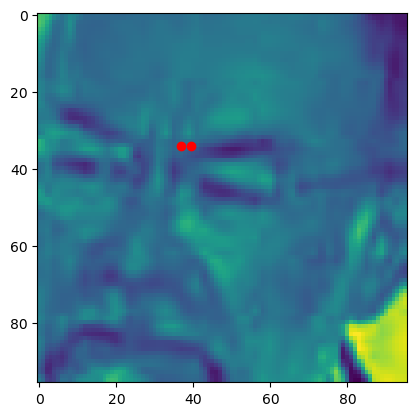

In [10]:
plt.imshow(image_tensor.unsqueeze(0)[0][0][0])

# Plot the points on the image
plt.plot(points[:2, 0], points[:2, 1], 'ro')
plt.show()

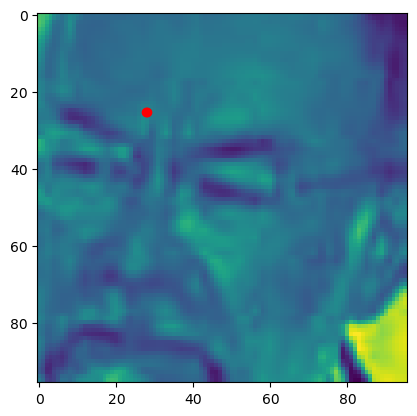

In [11]:
plt.imshow(image_tensor.unsqueeze(0)[0][0][0])

# Plot the points on the image
plt.plot(points[2:4, 0], points[2:4, 1], 'ro')
plt.show()

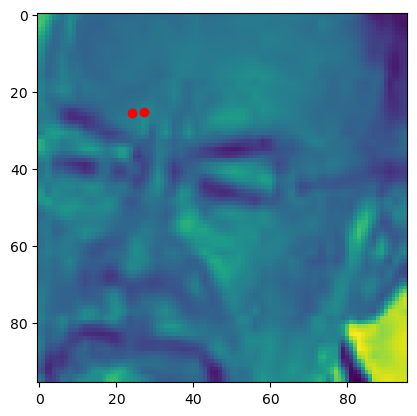

In [12]:
plt.imshow(image_tensor.unsqueeze(0)[0][0][0])

# Plot the points on the image
plt.plot(points[4:6, 0], points[4:6, 1], 'ro')
plt.show()

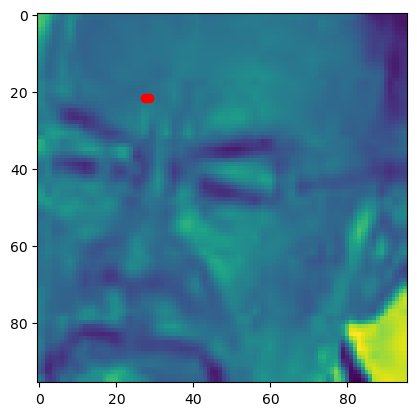

In [13]:
plt.imshow(image_tensor.unsqueeze(0)[0][0][0])

# Plot the points on the image
plt.plot(points[6:8, 0], points[6:8, 1], 'ro')
plt.show()

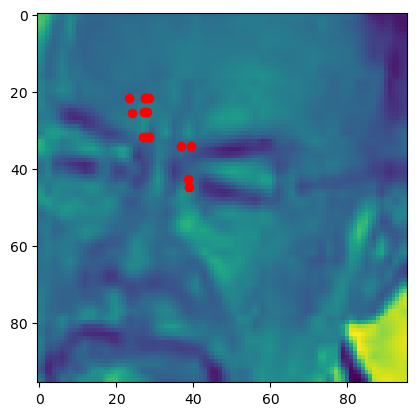

In [14]:
plt.imshow(image_tensor.unsqueeze(0)[0][0][0])

# Plot the points on the image
plt.plot(points[:, 0], points[:, 1], 'ro')
plt.show()

In [15]:
li = [
    39.69187927246094,
    34.41676330566406,
    37.244075775146484,
    34.60688400268555,
    28.24993896484375,
    25.35147476196289,
    28.176700592041016,
    25.669921875,
    27.524560928344727,
    25.454111099243164,
    24.729806900024414,
    25.107276916503906,
    28.363452911376953,
    21.471481323242188,
    27.533794403076172,
    21.726276397705078,
    27.825572967529297,
    21.678396224975586,
    23.53978157043457,
    22.136741638183594,
    39.30657196044922,
    42.73969268798828,
    28.475248336791992,
    31.954742431640625,
    26.90538787841797,
    31.815969467163086,
    28.185495376586914,
    31.947460174560547,
    39.19987487792969,
    45.03831100463867
  ]

In [16]:
points = np.zeros((15,2))

count = 0
for i in range(15):
    for j in range(2):
        points[i,j] = li[count]
        count += 1
points

array([[39.69187927, 34.41676331],
       [37.24407578, 34.606884  ],
       [28.24993896, 25.35147476],
       [28.17670059, 25.66992188],
       [27.52456093, 25.4541111 ],
       [24.7298069 , 25.10727692],
       [28.36345291, 21.47148132],
       [27.5337944 , 21.7262764 ],
       [27.82557297, 21.67839622],
       [23.53978157, 22.13674164],
       [39.30657196, 42.73969269],
       [28.47524834, 31.95474243],
       [26.90538788, 31.81596947],
       [28.18549538, 31.94746017],
       [39.19987488, 45.038311  ]])

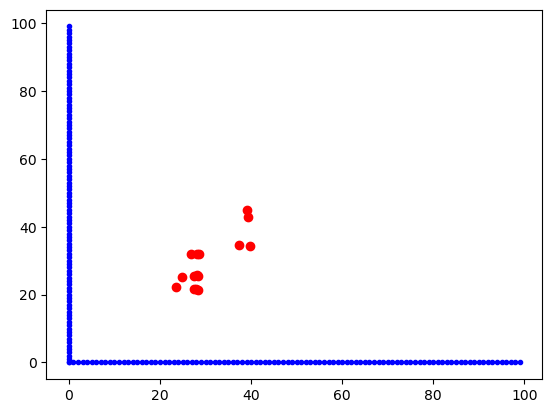

In [17]:
f = plt.figure()
plt.plot(points[:, 0], points[:, 1], 'ro')
plt.plot(list(range(100)), [0]*100, 'b.')
plt.plot([0]*100, list(range(100)), 'b.')
plt.show()